In [2]:
include("../InfectionSim.jl")
include("../ODEFIT.jl")

initSIR (generic function with 1 method)

# Fit ODE Parameters to Single Simulation

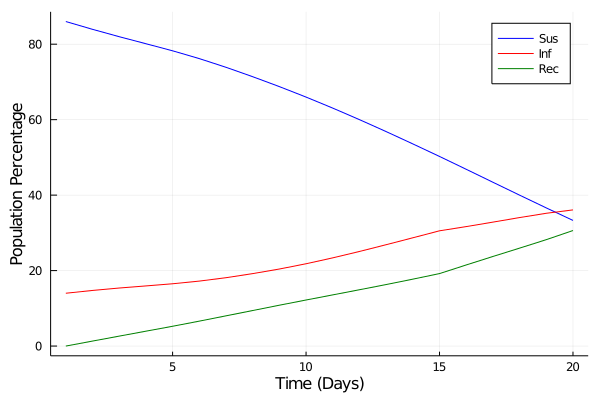

In [20]:
param = initParams(
    infections_path="../data/Sample50.csv",
    viral_loads_path="../data/raw_viral_load.csv",
    symptomatic_isolation_prob = 0.95,
    asymptomatic_prob = 0.65
)
state = initState(fill(10_000,14),param, N=1_000_000)
action = Action(0.0)
simHist = Simulate(20, state, param, action)
plotHist(simHist)

In [21]:
res, p = FitModel(:SIR, simHist, zeros(2), fill(10.,2))

( * Status: success

 * Candidate solution
    Final objective value:     2.334236e-02

 * Found with
    Algorithm:     Fminbox with BFGS

 * Convergence measures
    |x - x'|               = 4.63e-10 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.55e-09 ≰ 0.0e+00
    |f(x) - f(x')|         = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 0.00e+00 ≤ 0.0e+00
    |g(x)|                 = 7.42e-11 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    4
    f(x) calls:    50
    ∇f(x) calls:   50
, [0.06199870088268342, 0.17077349956590698])

In [22]:
sol = SolveODE(:SIR, initSIR(simHist), simHist.T, p);

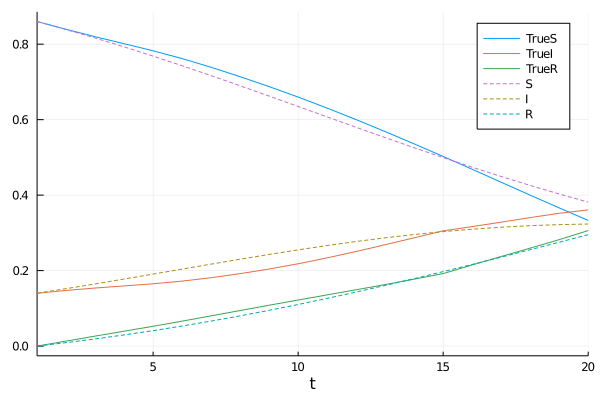

In [23]:
plot(Array(simHist)'./simHist.N, labels= ["TrueS" "TrueI" "TrueR"])
plot!(sol, ls=:dash, label=["S" "I" "R"])

In [24]:
lower = zeros(3)
upper = fill(10.,3)
res, p = FitModel(:SEIR, simHist, lower, upper)

( * Status: success

 * Candidate solution
    Final objective value:     2.229066e-02

 * Found with
    Algorithm:     Fminbox with BFGS

 * Convergence measures
    |x - x'|               = 2.29e-10 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.00e-10 ≰ 0.0e+00
    |f(x) - f(x')|         = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 0.00e+00 ≤ 0.0e+00
    |g(x)|                 = 1.01e-09 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    4
    f(x) calls:    262
    ∇f(x) calls:   262
, [0.06834159797138613, 0.1884342457623128, 1.1240351526398127])

In [25]:
sol = SolveODE(:SEIR, initSEIR(simHist), simHist.T, p);

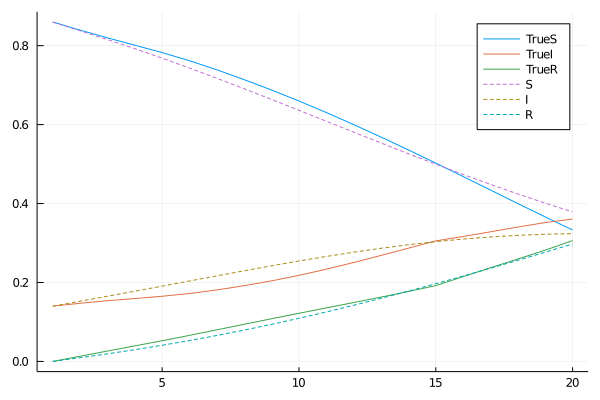

In [26]:
plot(Array(simHist)'./simHist.N, labels= ["TrueS" "TrueI" "TrueR"])
plot_arr = sol[[1,3,4],:]
plot_arr[2,:] += sol[2,:]
plot!(plot_arr', ls=:dash, labels=["S" "I" "R"])

# Fit Parameters to Random Simulation Ensemble

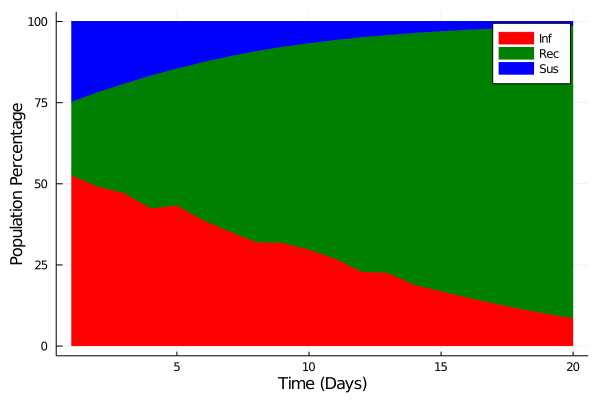

In [31]:
# Generate Data With random starting parameters
simHist = Simulate(T, initState(param), param, action)
plotHist(simHist,kind=:stack,order="IRS")

In [32]:
lb = zeros(2); ub = fill(10.,2);
T = 20; # Sim Time
N = 100; # Number of Random Sims
res, p = EnsembleFitSIR(T, N, param, action, lb, ub)

( * Status: success

 * Candidate solution
    Final objective value:     9.099984e+00

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   1  (vs limit Inf)
    Iterations:    46
    f(x) calls:    95
, [0.09607357678084766, 0.3129832504477723])

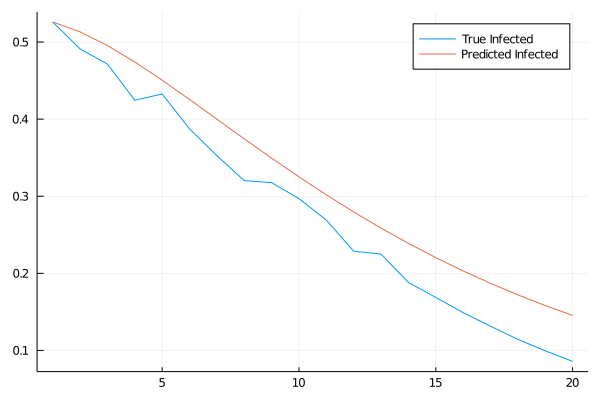

In [35]:
plot(simHist.inf./simHist.N, label= "True Infected")
sol = Array(SolveODE(:SIR,initSIR(simHist),T,p))
plot!(sol[2,:], label="Predicted Infected")

In [37]:
lb = zeros(3); ub = fill(10.,3);
T = 20; # Sim Time
N = 100; # Number of Random Sims 
res, p = EnsembleFitSEIR(T, N, param, action, lb, ub)

Iter     Function value    √(Σ(yᵢ-ȳ)²)/n 
------   --------------    --------------
     0     2.158182e+02     1.017152e+01
 * time: 8.702278137207031e-5
    10     1.217469e+02     6.717778e+00
 * time: 0.13047504425048828
    20     1.897920e+01     3.057993e+00
 * time: 0.32039403915405273
    30     1.055152e+01     1.341021e+00
 * time: 0.43813490867614746
    40     1.034439e+01     3.671006e-02
 * time: 0.5787849426269531
    50     1.028525e+01     1.568833e-03
 * time: 0.6857049465179443
    60     1.027242e+01     4.736271e-03
 * time: 0.833967924118042
    70     1.013688e+01     3.100493e-02
 * time: 0.9608149528503418
    80     8.536664e+00     1.146849e-01
 * time: 1.4335169792175293
    90     8.055140e+00     3.846523e-02
 * time: 1.5850110054016113
   100     7.373392e+00     1.009362e-01
 * time: 1.687736988067627
   110     7.197068e+00     6.886533e-03
 * time: 1.7972779273986816
   120     7.180961e+00     3.829318e-04
 * time: 1.9166979789733887
   130     7.18

( * Status: success

 * Candidate solution
    Final objective value:     7.178164e+00

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   3  (vs limit Inf)
    Iterations:    184
    f(x) calls:    328
, [0.13267618158607514, 0.4241734542907132, 0.1702111367252953])

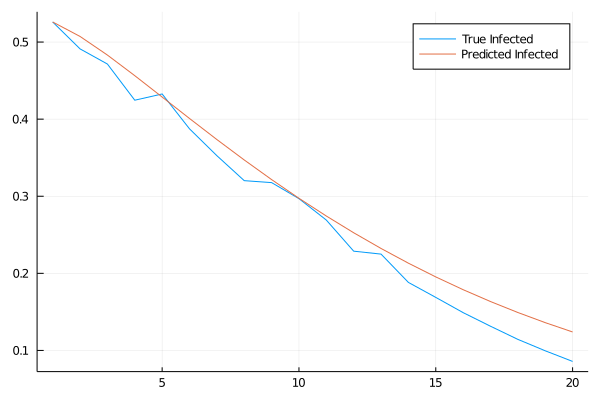

In [38]:
plot(simHist.inf./simHist.N, label="True Infected")
sol = Array(SolveODE(:SEIR,initSEIR(simHist),T,p))
plot!(sol[2,:] + sol[3,:], label="Predicted Infected")